In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os 
from sklearn.model_selection import train_test_split


In [22]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [23]:
data = []
labels = []
classes = 5
cur_path = os.getcwd() 
print(cur_path)

C:\Users\ANKUR KESHRI\OneDrive\Desktop


In [24]:
for i in range(classes):
    path = os. path.join(cur_path,'Train', str(i)) 
    images = os.listdir(path)
    for a in images: 
        print(path + "\\"+ a)
        image = Image.open(path + "/"+ a)
        size_image = image.resize((30, 30))
#         image = np.array(image) 
        data.append(np.array(size_image))
        labels.append(i) 
data = np.array(data)
labels = np.array(labels)

C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00000.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00001.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00002.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00003.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00004.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00005.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00006.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00007.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00008.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00009.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00010.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00011.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00012.png
C:\Users\ANKUR KESHRI\OneDrive\Desktop\Train\0\00000_00000_00013.png
C:\Users\ANKUR KESHRI\OneDrive\Des

In [25]:
print(labels.shape)

(8070,)


In [26]:
data.shape

(8070, 30, 30, 3)

In [27]:
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)


(6456, 30, 30, 3) (1614, 30, 30, 3) (6456,) (1614,)


In [28]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
eps = 5
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/5
202/202 [==============================] - 17s 68ms/step - loss: 1.8867 - accuracy: 0.4919 - val_loss: 0.4214 - val_accuracy: 0.8482
Epoch 2/5
202/202 [==============================] - 18s 87ms/step - loss: 0.4429 - accuracy: 0.8529 - val_loss: 0.1146 - val_accuracy: 0.9665
Epoch 3/5
202/202 [==============================] - 17s 85ms/step - loss: 0.2429 - accuracy: 0.9207 - val_loss: 0.0630 - val_accuracy: 0.9820
Epoch 4/5
202/202 [==============================] - 16s 80ms/step - loss: 0.1880 - accuracy: 0.9441 - val_loss: 0.0667 - val_accuracy: 0.9789
Epoch 5/5
202/202 [==============================] - 16s 81ms/step - loss: 0.1604 - accuracy: 0.9511 - val_loss: 0.0435 - val_accuracy: 0.9857


In [31]:
training_accuracy = anc.history['accuracy']
training_accuracy

[0.4919454753398895,
 0.852850079536438,
 0.9206939339637756,
 0.944083034992218,
 0.951053261756897]

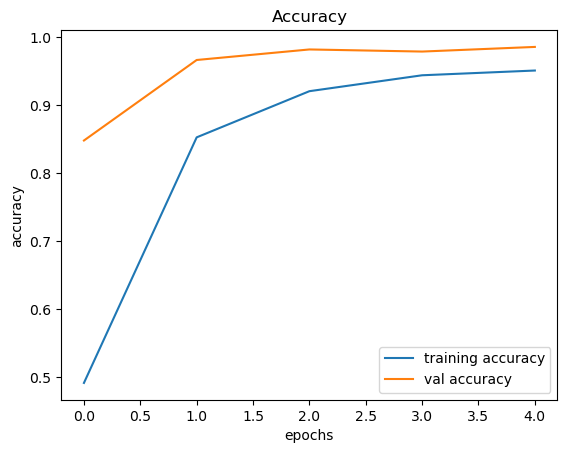

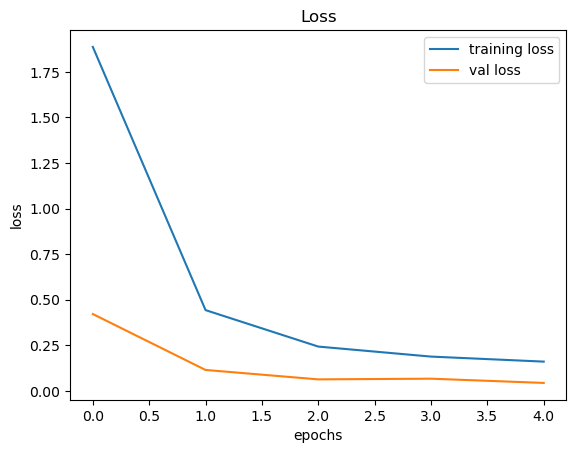

In [32]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
# from sklearn.metrics import accuracy_score
# y_test = pd.read_csv('Test.csv')
# labels = y_test["ClassId"].values
# imgs = y_test["Path"].values
# data=[]
# for img in imgs:
#     image = Image.open(img)
#     image = image.resize((30,30))
#     data.append(np.array(image))
# X_test=np.array(data)


In [15]:
# X_test.shape

In [16]:
# X_test_float = X_test.astype(np.float32)
# pred = model.predict_classes(X_test_float)


In [17]:
# #Accuracy with the test data
# from sklearn.metrics import accuracy_score
# print(accuracy_score(labels, pred))

In [33]:
model.save("traffic_classifier.h5")